<a href="https://colab.research.google.com/github/anastasiiaCher/python-for-DPaV/blob/main/labs/%D0%9B%D0%A02_%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B5_%D1%81%D0%BF%D0%BE%D1%81%D0%BE%D0%B1%D1%8B_%D0%B2%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Выполнил: Джараян Арег

# Постановка задачи


**Цель работы:** изучение основных способов визуализации табличных данных с помощью модулей `seaborn`, `plotly` и `altair`.

**Краткое описание:** в лабораторной работе представлено 10 заданий на построение графиков разных видов. В каждом задании указано, каким видом графика стоит воспользоваться для визуализации данных. По каждому заданию необходимо построить график дважды: первый раз с помощью модуля `seaborn`, второй – с помощью `plotly` или `altair` на выбор студента.

# Данные


В папке [Data/lab2](https://drive.google.com/drive/folders/1e0E4vQzaE9LBZgfzz0AzsyAXgtH0eMaP?usp=share_link) расположена таблица с информацией о песнях, исполненных на Евровидении с 2009 по 2023 год. Все задания лабораторной работы необходимо выполнять по этим данным. Данные в полном объеме можно найти [по ссылке](https://www.kaggle.com/datasets/diamondsnake/eurovision-song-contest-data).

##### **Формат данных**

```
year,country,artist_name,song_name,language,style,gender,main_singers,key,BPM,energy,danceability,happiness,loudness,acousticness,instrumentalness,liveness,speechiness,final_place
2023,Norway,Alessandra,Queen of Kings,English,Pop,Female,1,E Minor,110,36,64,23,10 dB,58,0,10,3,5
2023,Malta,The Busker,Dance (Our Own Party),English,Pop,Male,1,F Minor,103,78,70,82,6 dB,2,0,18,4,
...
```
##### **Описание полей**

- ```year``` – год;
- ```country``` – страна участника;
- ```artist_name``` – исполнитель;
- ```song_name``` – название песни;
- ```language``` – язык, на котором исполняется песня;
- ```style```	– жанр;
- ```gender``` – пол участника;
- ```main_singers``` – количество вокалистов;
- ```key```	– регистр (высота тона);
- ```BPM``` – скорость композиции в целом (количество четвертых нот в минуту);
- ```energy``` – энергичность композиции;
- ```danceability``` – танцевальность (насколько трек подходит для танцев);
- ```happiness``` – жизнерадостность;
- ```loudness``` – громкость;
- ```acousticness``` – акустичность;
- ```instrumentalness``` – инструментальность;
- ```liveness``` – живость;
- ```speechiness``` – насколько много текста;
- ```final_place``` – место в фонале.

# Практические задания

>По каждому заданию должен быть сделан вывод. Также нужно обязательно добавлять подпись графика и осей.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt
import seaborn as sns

## Задание 1

Проведите предобработку числовых значений в датасете:
1. В столбцах `BPM`, `energy`, `danceability`, `happiness`, `acousticness`, `instrumentalness`, `liveness`, `speechiness` замените отсутствующие значения и прочерки на 0.
2. В столбце `loudness` оставьте только число без единиц измерения.
3. Во всех перечисленных в пунктах 1 и 2 столбцах преобразуйте значения в тип данных `float`.

In [ ]:
df = pd.read_csv("song_data (2).csv")

# список числовых столбцов, где нужно заменить пропуски и тире
num_cols = [
    'BPM', 'energy', 'danceability', 'happiness',
    'acousticness', 'instrumentalness', 'liveness', 'speechiness'
]

# заменить '-' и NaN на 0
df[num_cols] = df[num_cols].replace('-', 0).fillna(0)

# loudness — убрать ' dB', оставить число
df['loudness'] = df['loudness'].astype(str).str.replace(' dB', '', regex=False)

# преобразовать всё указанное в float
df[num_cols + ['loudness']] = df[num_cols + ['loudness']].astype(float)

# Проверка
print(df.dtypes)
print(df.head())

year                  int64
country              object
artist_name          object
song_name            object
language             object
style                object
gender               object
main_singers          int64
key                  object
BPM                 float64
energy              float64
danceability        float64
happiness           float64
loudness            float64
acousticness        float64
instrumentalness    float64
liveness            float64
speechiness         float64
final_place         float64
dtype: object
   year   country    artist_name              song_name          language  \
0  2023    Norway     Alessandra         Queen of Kings           English   
1  2023     Malta     The Busker  Dance (Our Own Party)           English   
2  2023    Serbia     Luke Black       Samo mi se spava  Serbian, English   
3  2023    Latvia  Sudden Lights                   Aija           English   
4  2023  Portugal        Mimicat             Ai coraçăo        Portug

## Задание 2

Покажите, какие характеристики музыки (`BPM`, `energy`, `danceability`, `happiness`, `acousticness`, `instrumentalness`, `liveness`, `speechiness`) коррелируют между собой. Для визуализации используйте диаграмму `heatmap`.

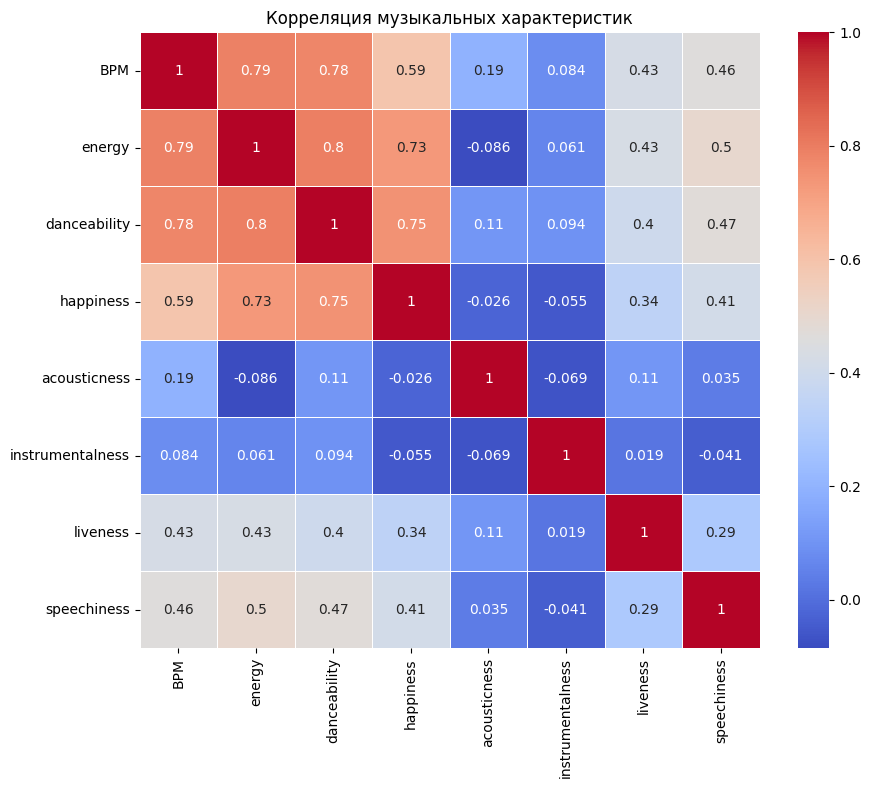

In [ ]:


# список нужных признаков
cols = [
    'BPM', 'energy', 'danceability', 'happiness',
    'acousticness', 'instrumentalness', 'liveness', 'speechiness'
]

# вычислить матрицу корреляций
corr_matrix = df[cols].corr()

# построить heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляция музыкальных характеристик')
plt.show()


## Задание 3

Покажите на диаграмме разброса взаимосвязь между жизнерадостностью (`happiness`) и энергичностью (`energy`) композиции. Добавьте на диаграмму вспомогательные элементы (отметку средних значений, выбросов) для упрощения интерпретации визуализации.



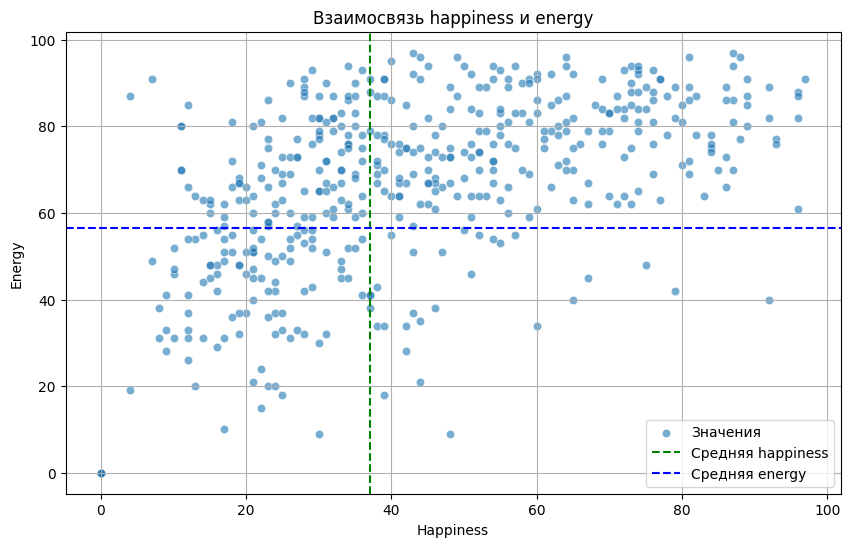

In [ ]:
# достаём числовые столбцы
df['happiness'] = df['happiness'].astype(float)
df['energy'] = df['energy'].astype(float)

# вычисляем средние
mean_happiness = df['happiness'].mean()
mean_energy = df['energy'].mean()

# Находим выбросы (IQR method)
Q1 = df['happiness'].quantile(0.25)
Q3 = df['happiness'].quantile(0.75)
IQR = Q3 - Q1

# выбросы по happiness
outliers = df[(df['happiness'] < Q1 - 1.5 * IQR) | (df['happiness'] > Q3 + 1.5 * IQR)]

# основной график
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='happiness',
    y='energy',
    alpha=0.6,
    label='Значения'
)

# отметим выбросы другим цветом
if len(outliers) > 0:
    sns.scatterplot(
        data=outliers,
        x='happiness',
        y='energy',
        color='red',
        label='Выбросы'
    )

# линии средних значений
plt.axvline(mean_happiness, color='green', linestyle='--', label='Средняя happiness')
plt.axhline(mean_energy, color='blue', linestyle='--', label='Средняя energy')

# подписи
plt.title("Взаимосвязь happiness и energy")
plt.xlabel("Happiness")
plt.ylabel("Energy")
plt.legend()
plt.grid(True)

plt.show()

## Задание 4

Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Отсортируйте диаграмму по убыванию количества композиций в жанре. Выделите контрастным цветом жанр, в котором больше всего песен.

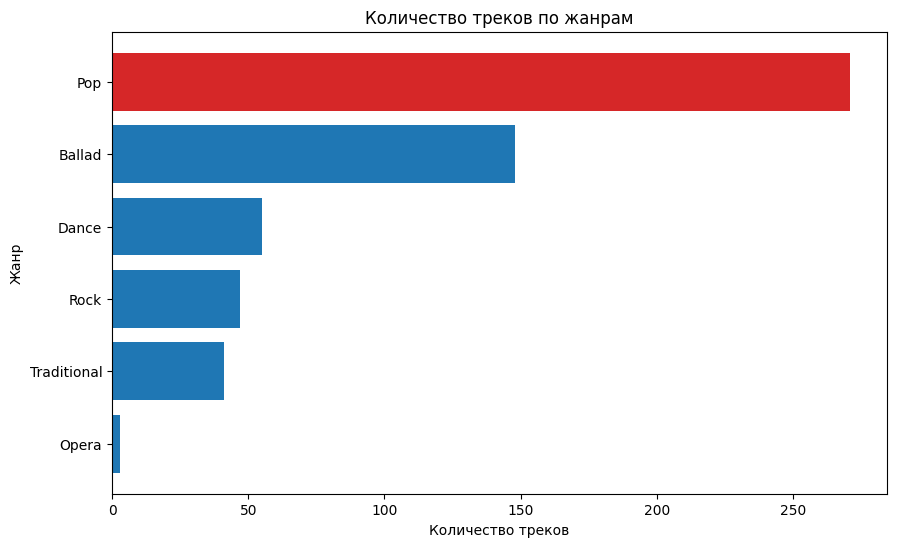

In [ ]:
# считаем количество песен по жанрам
genre_counts = df['style'].value_counts()

# определяем самый популярный жанр
top_genre = genre_counts.idxmax()

# подготавливаем цвета: для топ-жанра — другой цвет
colors = ['tab:red' if genre == top_genre else 'tab:blue' for genre in genre_counts.index]

# построение горизонтальной диаграммы
plt.figure(figsize=(10, 6))
plt.barh(genre_counts.index, genre_counts.values, color=colors)
plt.gca().invert_yaxis()  # чтобы самый большой был сверху

# подписи
plt.title("Количество треков по жанрам")
plt.xlabel("Количество треков")
plt.ylabel("Жанр")

plt.show()

## Задание 5

Покажите на круговой диаграмме страны, участники из которых побеждали чаще других, и в каких годах они выигрывали. Диаграмма должна быть одна.

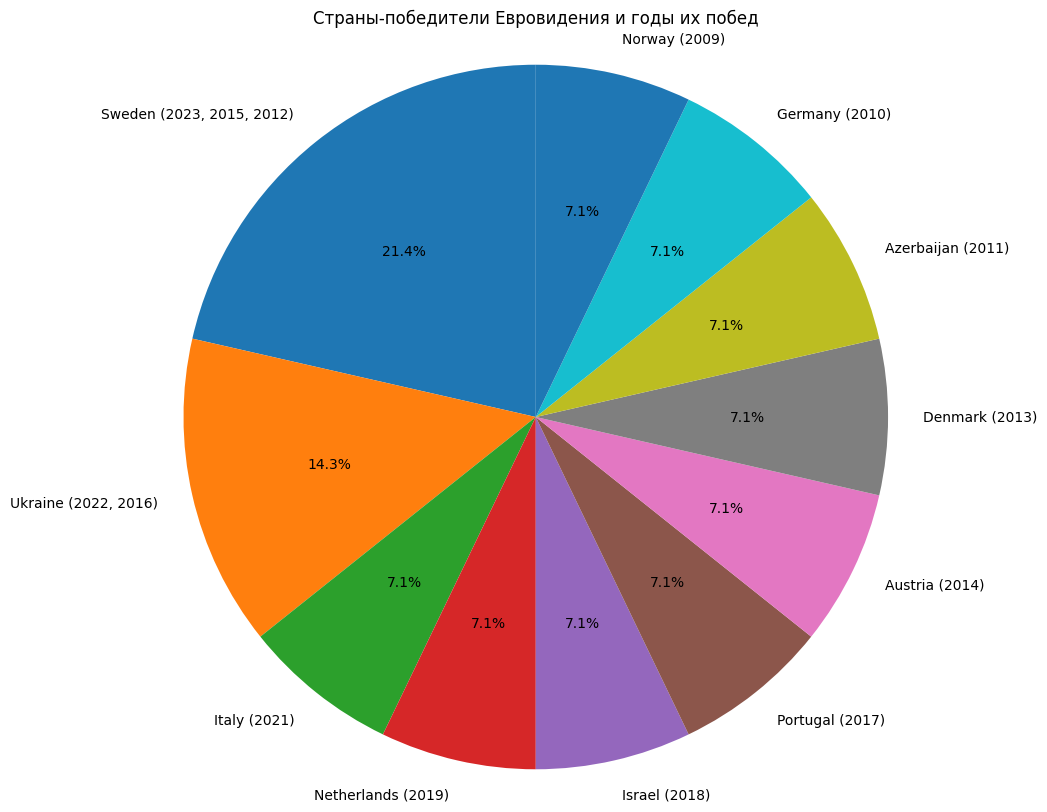

In [ ]:
# выделяем только победителей (1-е место)
winners = df[df['final_place'] == 1]

# сколько побед по странам
win_counts = winners['country'].value_counts()

# собираем словарь: страна -> список годов побед
years_by_country = winners.groupby('country')['year'].apply(list)

# формируем подписи: "Country (2009, 2015, ...)"
labels = [f"{country} ({', '.join(map(str, years_by_country[country]))})"
          for country in win_counts.index]

# круговая диаграмма
plt.figure(figsize=(10, 10))
plt.pie(win_counts.values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Страны-победители Евровидения и годы их побед")
plt.axis('equal')   # чтобы круг не был овальным
plt.show()


## Задание 6

На вертикальной столбчатой диаграмме с группировкой покажите количество мужчин и женщин среди участников в каждом году, представленном в датасете.

<Figure size 1200x600 with 0 Axes>

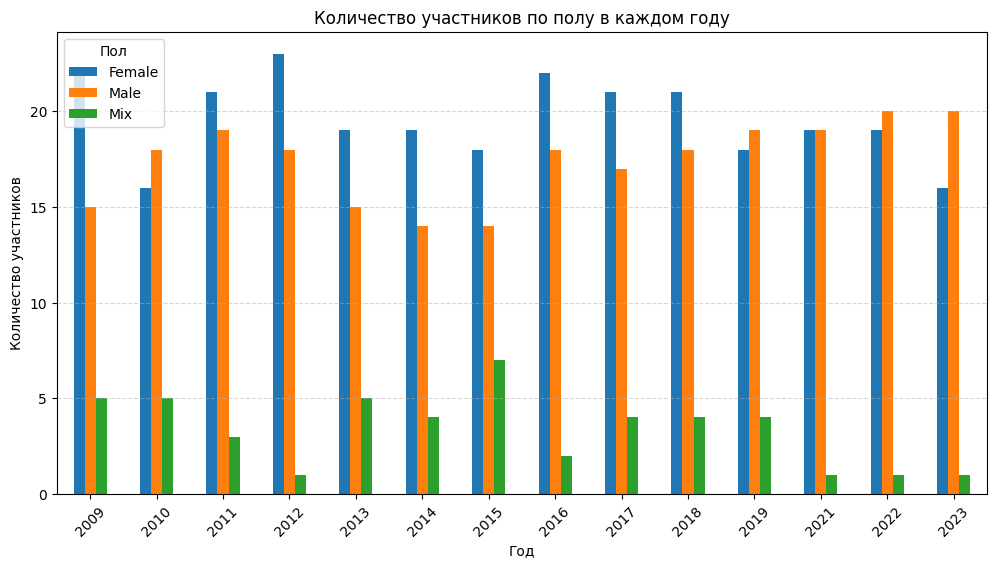

In [ ]:
# считаем количество участников по годам и полу
gender_year = df.groupby(["year", "gender"]).size().reset_index(name="count")

# преобразуем в формат таблицы год × пол
pivot = gender_year.pivot(index="year", columns="gender", values="count").fillna(0)

# построение группированной диаграммы
plt.figure(figsize=(12,6))
pivot.plot(kind="bar", figsize=(12,6))

plt.title("Количество участников по полу в каждом году")
plt.xlabel("Год")
plt.ylabel("Количество участников")
plt.xticks(rotation=45)
plt.legend(title="Пол")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

## Задание 7

Постройте график плотности распределения данных в столбце `danceability` (танцевальность), сгруппированных по категориям жанрам.

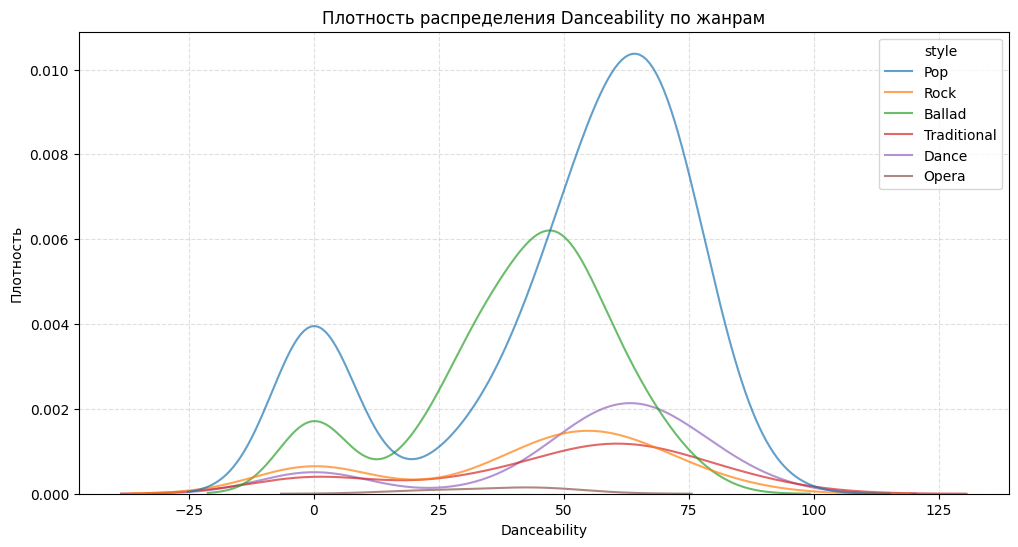

In [ ]:
# на всякий случай превращаем в float
df['danceability'] = df['danceability'].astype(float)

plt.figure(figsize=(12, 6))
sns.kdeplot(
    data=df,
    x='danceability',
    hue='style',              # группировка по жанрам
    fill=False,               # можно True, если хотите заливку
    alpha=0.7
)

plt.title('Плотность распределения Danceability по жанрам')
plt.xlabel('Danceability')
plt.ylabel('Плотность')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


## Задание 8

Покажите на ящиковой диаграмме взяимосвязь позиции в финальном рейтинге со страной. Итоги каких стран похожи между собой?

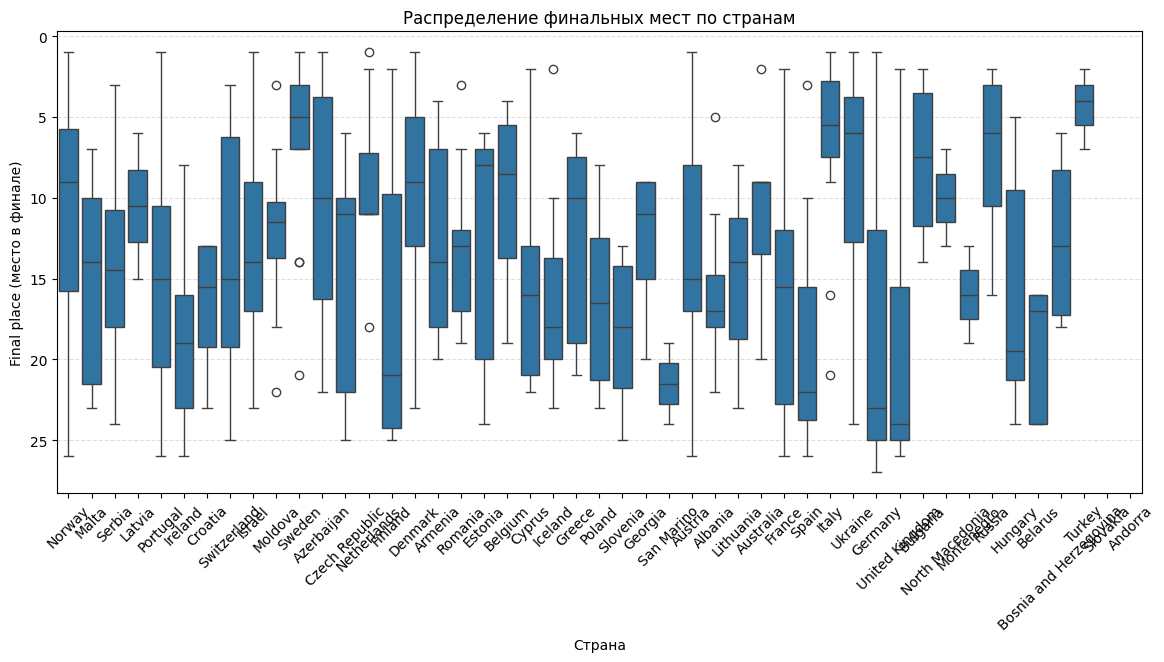

In [ ]:
# приводим столбец к числам
df['final_place'] = pd.to_numeric(df['final_place'], errors='coerce')

plt.figure(figsize=(14,6))
sns.boxplot(
    data=df,
    x='country',
    y='final_place'
)

plt.title('Распределение финальных мест по странам')
plt.xlabel('Страна')
plt.ylabel('Final place (место в финале)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.gca().invert_yaxis()  # важный момент: 1 место — лучше, поэтому инвертируем
plt.show()

## Задание 9

Покажите на карте количество раз, когда каждая страна датасета проходила в финал.

<Figure size 1500x1000 with 0 Axes>

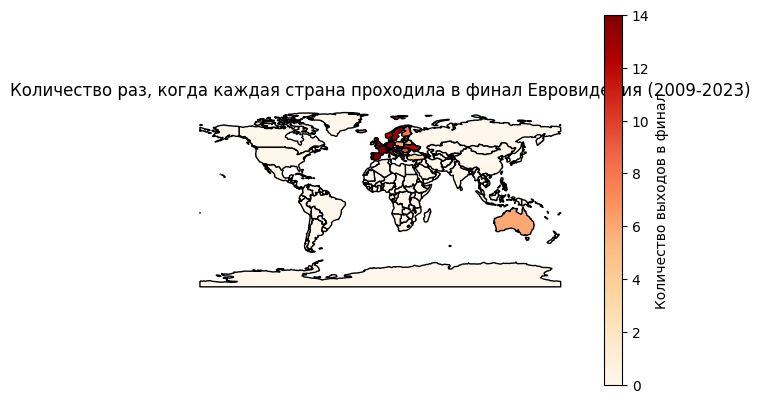

In [ ]:
# оставляем только строки с финальными местами
finals = df[df['final_place'].notna()]

# считаем количество финалов по странам
final_counts = finals['country'].value_counts().reset_index()
final_counts.columns = ['country', 'finals_count']

# создаем словарь соответствий стран для корректного объединения с картой
country_mapping = {
    "UK": "United Kingdom",
    "Russia": "Russian Federation",
    "Macedonia": "North Macedonia",
    "FYR Macedonia": "North Macedonia",
    "Czechia": "Czech Republic",
    "Bosnia & Herzegovina": "Bosnia and Herzegovina",
    "Serbia & Montenegro": "Serbia",
    # при необходимости можно добавить другие
}

final_counts['country'] = final_counts['country'].replace(country_mapping)

# Загружаем карту мира (GeoJSON)
world = gpd.read_file(
    "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
)

# Совмещаем данные по странам
merged = world.merge(final_counts, left_on='ADMIN', right_on='country', how='left')
merged['finals_count'] = merged['finals_count'].fillna(0)

# Построение карты
plt.figure(figsize=(15,10))
merged.plot(column='finals_count', cmap='OrRd', legend=True,
            legend_kwds={'label': "Количество выходов в финал"},
            edgecolor='black')

plt.title("Количество раз, когда каждая страна проходила в финал Евровидения (2009-2023)")
plt.axis('off')
plt.show()


## Задание 10

Покажите на диаграмме вида `treemap`, сколько раз каждая страна входила в топ-3 победителей.

*В `seaborn` нет такого типа графика, с помощью этого модуля строить график не нужно.*

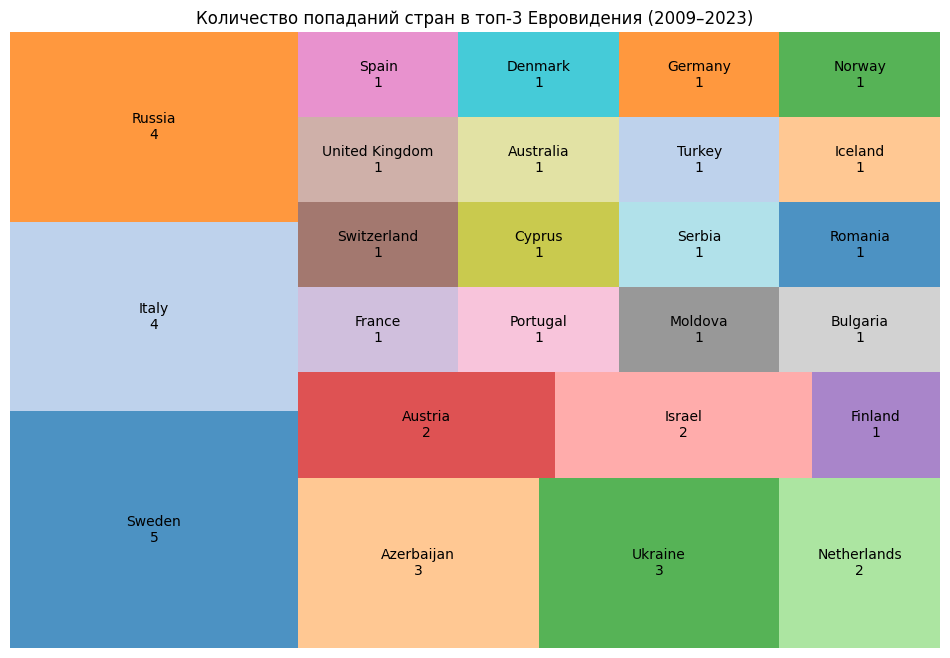

In [ ]:
# Установка squarify (только один раз)
!pip install squarify

# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Загружаем CSV (предположим, что файл загружен в Colab)
df = pd.read_csv("/content/song_data (2).csv")

# Фильтруем песни, которые попали в топ-3
top3 = df[df['final_place'].notna() & (df['final_place'] <= 3)]

# Считаем количество попаданий по странам
top3_counts = top3['country'].value_counts()

# Строим treemap
plt.figure(figsize=(12,8))
squarify.plot(
    sizes=top3_counts.values,
    label=[f"{c}\n{v}" for c, v in zip(top3_counts.index, top3_counts.values)],
    alpha=0.8,
    color=plt.cm.tab20.colors
)
plt.title("Количество попаданий стран в топ-3 Евровидения (2009–2023)")
plt.axis('off')
plt.show()


# Порядок защиты работы

**Для защиты работы необходимо:**
1. Предоставить результаты выполнения 10 заданий в виде ссылки на Google Colab.
2. Выполнить дополнительное задание в процессе сдачи работы. Дополнительное задание представляет собой построение визуализации по данным из лабораторной работы, по сложности аналогичной тем, что требовалось выполнить в рамках работы.

**Примеры дополнительных заданий:**
1. Покажите на ящиковой диаграмме распределение танцевальности для каждого жанра. Выполните с помощью `seaborn`.
2. На круговой диаграмме покажите исполнителей, которые участвовали больше одного раза и какие места они занимали. Выполните с помощью `plotly`.
3. Покажите на диаграмме вида `treemap`, сколько раз каждая страна проходила в финал. Выполните с помощью `plotly`.

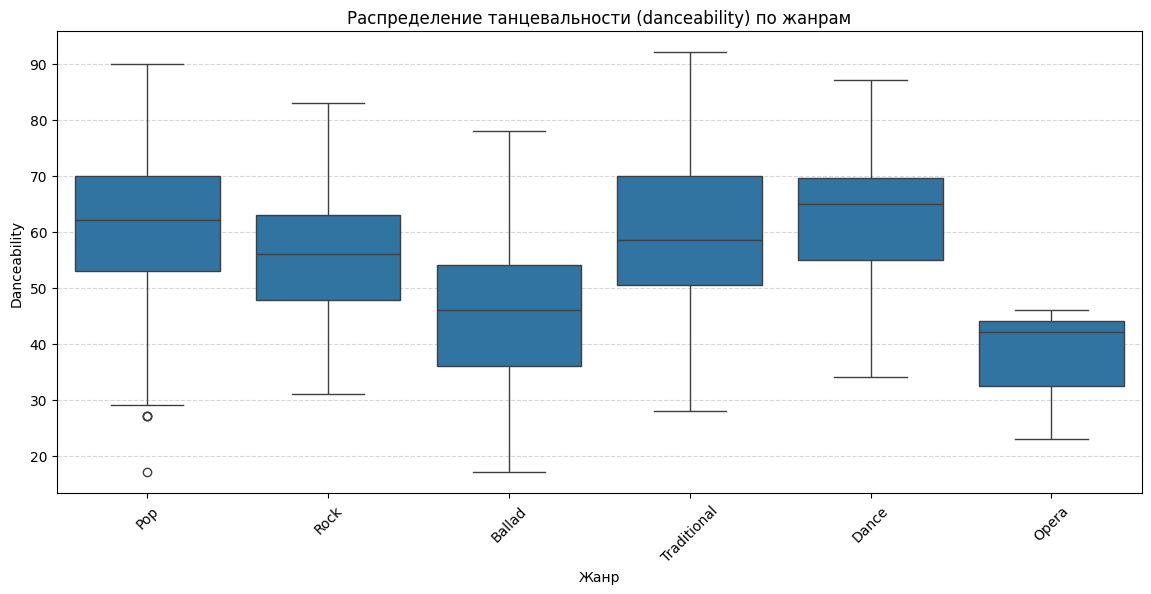

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем данные
df = pd.read_csv("song_data (2).csv")

# Убедимся, что danceability — числовой столбец
df['danceability'] = pd.to_numeric(df['danceability'], errors='coerce')

plt.figure(figsize=(14,6))
sns.boxplot(
    data=df,
    x='style',          # жанр
    y='danceability'    # танцевальность
)

plt.title("Распределение танцевальности (danceability) по жанрам")
plt.xlabel("Жанр")
plt.ylabel("Danceability")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [28]:
# Оставляем только строки с финальными местами
df['final_place'] = pd.to_numeric(df['final_place'], errors='coerce')
df_non_null = df[df['final_place'].notna()]

# Считаем количество участий каждого исполнителя
artist_counts = df_non_null['artist_name'].value_counts()

# Берём только исполнителей с более чем 1 участием
repeat_artists = artist_counts[artist_counts > 1].index
df_repeat = df_non_null[df_non_null['artist_name'].isin(repeat_artists)]

# Формируем подписи: "Имя (места через запятую)"
artist_places = df_repeat.groupby('artist_name')['final_place'].apply(lambda x: ', '.join(map(str, x))).reset_index()
artist_places['count'] = df_repeat.groupby('artist_name').size().values

# Строим круговую диаграмму
fig = px.pie(
    artist_places,
    values='count',
    names='artist_name',
    hover_data=['final_place'],
    title='Исполнители, участвовавшие более одного раза, и их места'
)

fig.update_traces(textinfo='label+percent', hovertemplate='<b>%{label}</b><br>Места: %{customdata[0]}<br>Количество участий: %{value}')
fig.show()

In [29]:
# Приводим final_place к числу
df['final_place'] = pd.to_numeric(df['final_place'], errors='coerce')

# Оставляем только записи с финальными местами
df_final = df[df['final_place'].notna()]

# Считаем количество финалов по странам
final_counts = df_final['country'].value_counts().reset_index()
final_counts.columns = ['country', 'finals_count']

# Строим treemap
fig = px.treemap(
    final_counts,
    path=['country'],       # страна как иерархия
    values='finals_count',  # размер блока
    color='finals_count',   # цвет по количеству
    color_continuous_scale='OrRd',
    title='Количество раз, когда каждая страна проходила в финал (2009–2023)'
)

fig.show()

# Дополнительные материалы

1. seaborn: statistical data visualization [Электронный ресурс]. URL: https://seaborn.pydata.org/ (дата обращения: 01.04.2024).
2. Plotly Open Source Graphing Libraries [Электронный ресурс]. URL: https://plotly.com/graphing-libraries/ (дата обращения: 01.04.2024).
3. Vega-Altair: Declarative Visualization in Python [Электронный ресурс]. URL: https://altair-viz.github.io/index.html (дата обращения: 01.04.2024).